In [2]:
import os

import kagglehub

from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

/opt/miniconda3/envs/sol_pro/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("ayushv322/animal-classification")

path = os.path.join(path, 'Data')

print("Path to dataset files:", path)

Path to dataset files: /Users/amrodriguez/.cache/kagglehub/datasets/ayushv322/animal-classification/versions/1/Data


In [4]:
import os

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if not os.path.isdir(folder_path) or folder.startswith('.'):
        continue 
    
    num_images = len(os.listdir(os.path.join(path, folder)))
    print(f'{folder}: {num_images} imágenes')


Zebra: 1000 imágenes
Buffalo: 1000 imágenes
Rhino: 1000 imágenes
Elephant: 1000 imágenes


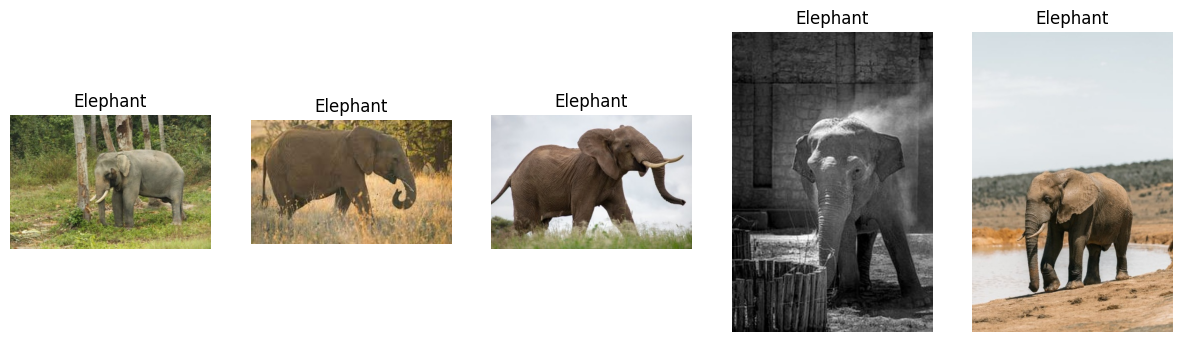

In [5]:
def show_sample_images(folder_path, class_name, n=5):

    class_path = os.path.join(folder_path, class_name)

    images = os.listdir(class_path)
    sample_images = random.sample(images, n)
    
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(class_path, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_sample_images(path, 'Elephant')

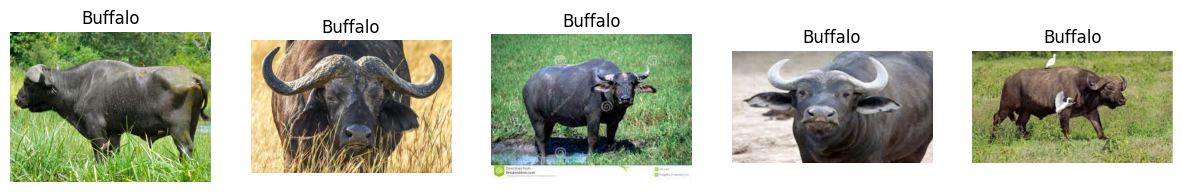

In [6]:
show_sample_images(path, 'Buffalo')

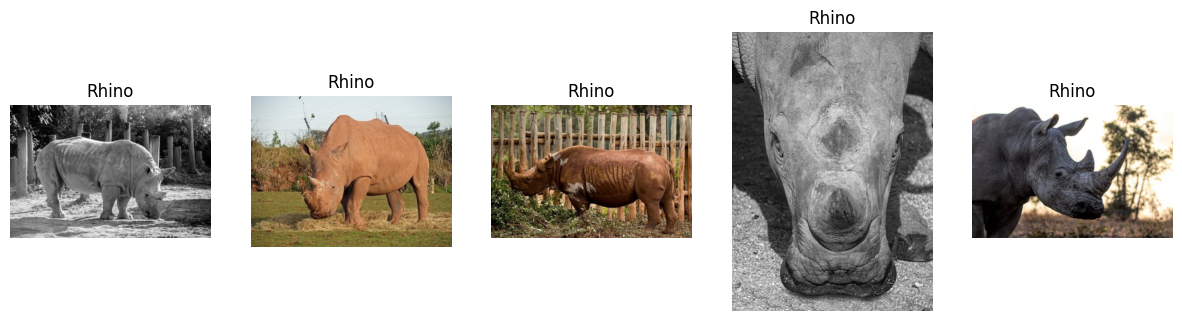

In [7]:
show_sample_images(path, 'Rhino')

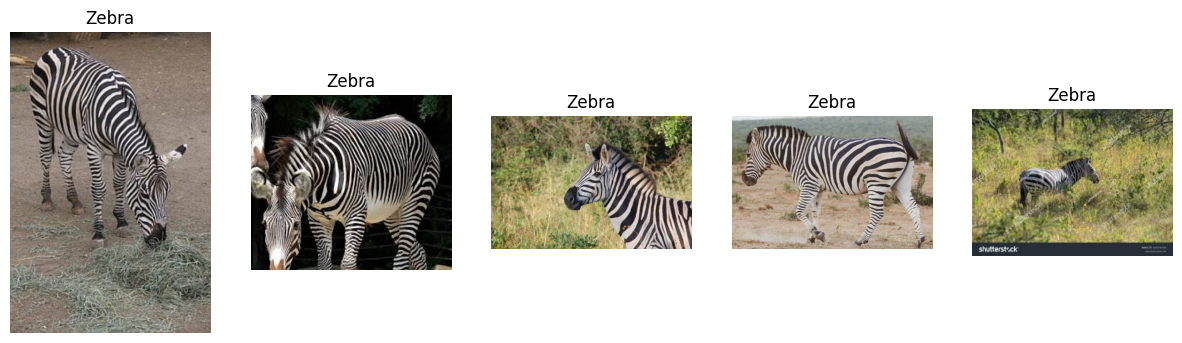

In [8]:
show_sample_images(path, 'Zebra')

In [9]:
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if not os.path.isdir(folder_path) or folder.startswith('.'):
        continue  # Ignora archivos como .DS_Store o archivos que no son carpetas

    num_images = len(os.listdir(os.path.join(path, folder)))
    print(f'{folder}: {num_images} imágenes')


Zebra: 1000 imágenes
Buffalo: 1000 imágenes
Rhino: 1000 imágenes
Elephant: 1000 imágenes


In [11]:
image_sizes = []

for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if not os.path.isdir(class_path) or folder.startswith('.'):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
        except:
            print(f"Imagen corrupta: {img_path}")

# Contar resoluciones más comunes
print(Counter(image_sizes).most_common(10))

[((400, 266), 1617), ((400, 300), 218), ((400, 267), 153), ((400, 265), 125), ((400, 600), 122), ((400, 224), 109), ((400, 225), 73), ((400, 299), 65), ((400, 601), 61), ((400, 599), 55)]


In [12]:
corrupt_files = []

for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if not os.path.isdir(class_path) or folder.startswith('.'):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Verifica pero no carga completamente
        except:
            corrupt_files.append(img_path)

print(f'{len(corrupt_files)} imágenes corruptas encontradas')

0 imágenes corruptas encontradas
